In [42]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
# import sklearn, re
# from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
# from sklearn.impute import SimpleImputer, KNNImputer
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

---
## Loading/Saving Data
 - `census_zip`: census demographic data by zipcode
 - `age_census`: census age data by zipcode
 - `area_facility`: population and area by facility ID
    - separated by **noise limited**, **terrain limited**, and **interference free**
    - only `interference free` used
 - `win_bids`:  winning bids data on Auction 1001
 

In [43]:
census_zip = pd.read_csv("data/census_zip.csv", engine="pyarrow")
age_census = pd.read_csv('data/age_census.csv', header=1, engine='pyarrow')
area_facility = pd.read_excel("data/areaFacility.xlsx", header=5)
win_bids = pd.read_csv("data/winning_bids.csv")

---
#### Exploratory Analysis on `age_census`

In [44]:
age_census.head()

,Geography,Geographic Area Name,Estimate!!Total!!Total population,Margin of Error!!Total!!Total population,Annotation of Margin of Error!!Total!!Total population,Annotation of Estimate!!Total!!Total population,Estimate!!Total!!Total population!!AGE!!Under 5 years,Margin of Error!!Total!!Total population!!AGE!!Under 5 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!Under 5 years,Annotation of Estimate!!Total!!Total population!!AGE!!Under 5 years,...,Annotation of Margin of Error!!Percent Female!!Total population!!SUMMARY INDICATORS!!Child dependency ratio,Estimate!!Percent Female!!Total population!!PERCENT ALLOCATED!!Sex,Annotation of Estimate!!Percent Female!!Total population!!PERCENT ALLOCATED!!Sex,Margin of Error!!Percent Female!!Total population!!PERCENT ALLOCATED!!Sex,Annotation of Margin of Error!!Percent Female!!Total population!!PERCENT ALLOCATED!!Sex,Estimate!!Percent Female!!Total population!!PERCENT ALLOCATED!!Age,Annotation of Estimate!!Percent Female!!Total population!!PERCENT ALLOCATED!!Age,Margin of Error!!Percent Female!!Total population!!PERCENT ALLOCATED!!Age,Annotation of Margin of Error!!Percent Female!!Total population!!PERCENT ALLOCATED!!Age,
0,860Z200US00601,ZCTA5 00601,17126,429,null,None,643,24,null,None,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),None
1,860Z200US00602,ZCTA5 00602,37895,279,null,None,1267,32,null,None,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),None
2,860Z200US00603,ZCTA5 00603,49136,841,null,None,1873,105,null,None,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),None
3,860Z200US00606,ZCTA5 00606,5751,355,null,None,223,24,null,None,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),None
4,860Z200US00610,ZCTA5 00610,26153,382,null,None,838,28,null,None,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),None


#### Renaming columns of `age_census` for readability

In [45]:
def column_rename(df):
    new_columns = []

    new_columns.append(df.columns[0])
    new_columns.append(df.columns[1])

    for c in range(2, len(df.columns)):
        new_columns.append("_".join(df.columns[c].split("!!")))

    df.columns = new_columns

    return df

age_census = column_rename(age_census)

#### Create `zipcode` column from ZCTA data

In [46]:
age_census['zipcode'] = age_census["Geography"].apply(lambda x: x.split("US")[1])

In [58]:
age_census = age_census.rename({"S0101_C01_032E":"age"},axis=1)
age_census.head()

,Estimate_Total_Total population,Estimate_Total_Total population_AGE_Under 5 years,Estimate_Total_Total population_AGE_5 to 9 years,Margin of Error_Total_Total population_AGE_5 to 9 years,Estimate_Total_Total population_AGE_10 to 14 years,Margin of Error_Total_Total population_AGE_10 to 14 years,Estimate_Total_Total population_AGE_15 to 19 years,Estimate_Total_Total population_AGE_20 to 24 years,Estimate_Total_Total population_AGE_25 to 29 years,Estimate_Total_Total population_AGE_30 to 34 years,...,Margin of Error_Female_Total population_SELECTED AGE CATEGORIES_16 years and over,Estimate_Female_Total population_SELECTED AGE CATEGORIES_18 years and over,Estimate_Female_Total population_SELECTED AGE CATEGORIES_21 years and over,Margin of Error_Female_Total population_SELECTED AGE CATEGORIES_21 years and over,Estimate_Female_Total population_SELECTED AGE CATEGORIES_60 years and over,Margin of Error_Female_Total population_SELECTED AGE CATEGORIES_60 years and over,Estimate_Female_Total population_SELECTED AGE CATEGORIES_62 years and over,Margin of Error_Female_Total population_SELECTED AGE CATEGORIES_62 years and over,Estimate_Female_Total population_SELECTED AGE CATEGORIES_65 years and over,Estimate_Female_Total population_SELECTED AGE CATEGORIES_75 years and over
0,17126,643,811,192,1166,196,1016,1054,1106,1016,...,257,7096,6816,210,2633,157,2232,171,1824,793
1,37895,1267,1671,283,2154,288,2259,2406,2467,2275,...,206,16117,15372,174,5893,203,5302,217,4102,1745
2,49136,1873,2037,431,3099,373,3196,2998,3142,2766,...,492,21062,19968,426,8080,317,7253,285,6076,2694
3,5751,223,259,77,312,63,361,388,313,337,...,151,2405,2263,148,992,131,883,133,725,332
4,26153,838,1369,250,1369,245,1513,1712,1802,1551,...,142,11263,10840,155,4116,177,3677,162,3010,1376


#### Dropping all non-numeric columns from `age_census`

In [48]:
tot_population = "Estimate_Total_Total population"

age_census = age_census._get_numeric_data()

age_census.head()

,Estimate_Total_Total population,Estimate_Total_Total population_AGE_Under 5 years,Estimate_Total_Total population_AGE_5 to 9 years,Margin of Error_Total_Total population_AGE_5 to 9 years,Estimate_Total_Total population_AGE_10 to 14 years,Margin of Error_Total_Total population_AGE_10 to 14 years,Estimate_Total_Total population_AGE_15 to 19 years,Estimate_Total_Total population_AGE_20 to 24 years,Estimate_Total_Total population_AGE_25 to 29 years,Estimate_Total_Total population_AGE_30 to 34 years,...,Margin of Error_Female_Total population_SELECTED AGE CATEGORIES_16 years and over,Estimate_Female_Total population_SELECTED AGE CATEGORIES_18 years and over,Estimate_Female_Total population_SELECTED AGE CATEGORIES_21 years and over,Margin of Error_Female_Total population_SELECTED AGE CATEGORIES_21 years and over,Estimate_Female_Total population_SELECTED AGE CATEGORIES_60 years and over,Margin of Error_Female_Total population_SELECTED AGE CATEGORIES_60 years and over,Estimate_Female_Total population_SELECTED AGE CATEGORIES_62 years and over,Margin of Error_Female_Total population_SELECTED AGE CATEGORIES_62 years and over,Estimate_Female_Total population_SELECTED AGE CATEGORIES_65 years and over,Estimate_Female_Total population_SELECTED AGE CATEGORIES_75 years and over
0,17126,643,811,192,1166,196,1016,1054,1106,1016,...,257,7096,6816,210,2633,157,2232,171,1824,793
1,37895,1267,1671,283,2154,288,2259,2406,2467,2275,...,206,16117,15372,174,5893,203,5302,217,4102,1745
2,49136,1873,2037,431,3099,373,3196,2998,3142,2766,...,492,21062,19968,426,8080,317,7253,285,6076,2694
3,5751,223,259,77,312,63,361,388,313,337,...,151,2405,2263,148,992,131,883,133,725,332
4,26153,838,1369,250,1369,245,1513,1712,1802,1551,...,142,11263,10840,155,4116,177,3677,162,3010,1376


---
### Working with `area_facility`

In [49]:
area_facility.head()

,Unnamed: 0,FacID,FileNumber,Call,Ch,City,St,Type,Area,Population,Area.1,Population.1,Area.2,Population.2
0,NaN,21488,BLCDT20110307ACV,KYES-TV,5,ANCHORAGE,AK,DT,31860.2,392105,30393.4,391590,30393.4,391590
1,NaN,804,BMLEDT20080325ADD,KAKM,8,ANCHORAGE,AK,DT,30495.9,380240,26625.7,379105,26625.7,379105
2,NaN,10173,BLCDT20090619ABI,KTUU-TV,10,ANCHORAGE,AK,DT,30495.9,380240,26489.7,379047,26489.7,379047
3,NaN,13815,BLCDT20090928AKO,KYUR,12,ANCHORAGE,AK,DT,29535.7,379943,25473.6,379027,25473.6,379027
4,NaN,35655,BLCDT20090608ABN,KTBY,20,ANCHORAGE,AK,DT,10074.4,348080,9261.0,346562,9261.0,346562


#### Dropping *noise limited* and *terrain limited* population/area)

In [50]:
for c in area_facility.columns:
    if ('Area' in c or 'Population' in c) and ".2" not in c:
        area_facility = area_facility.drop(c, axis=1)

area_facility = (area_facility
                .rename({"Area.2":"Area", 
                "Population.2":"Population",
                "FacID":"facility_id"}, axis=1)
                .drop("Unnamed: 0", axis=1))

area_facility.head()

,facility_id,FileNumber,Call,Ch,City,St,Type,Area,Population
0,21488,BLCDT20110307ACV,KYES-TV,5,ANCHORAGE,AK,DT,30393.4,391590
1,804,BMLEDT20080325ADD,KAKM,8,ANCHORAGE,AK,DT,26625.7,379105
2,10173,BLCDT20090619ABI,KTUU-TV,10,ANCHORAGE,AK,DT,26489.7,379047
3,13815,BLCDT20090928AKO,KYUR,12,ANCHORAGE,AK,DT,25473.6,379027
4,35655,BLCDT20090608ABN,KTBY,20,ANCHORAGE,AK,DT,9261.0,346562


---
### Exploratory analysis on `win_bids`

In [51]:
win_bids.head()

,auction_id,call_sign,facility_id,dma,bidder_as_of_closing_pn,frn_as_of_closing_pn,pre_auction_band,winning_bid_option,compensation,pre_auction_csa_flag,post_auction_csa_flag
0,1001,WCDC-TV,74419,"Albany-Schenectady-Troy, NY","NEXSTAR BROADCASTING, INC.",9961889,UHF,Go off-air,34558086,No,Yes
1,1001,WAGT,70699,"Augusta, GA","Gray Television Licensee, LLC",3748241,UHF,Go off-air,40763036,No,No
2,1001,WUTB,60552,"Baltimore, MD","Deerfield Media (Baltimore) Licensee, LLC",22739833,UHF,Go off-air,122912964,Yes,Yes
3,1001,WBIN-TV,14682,"Boston, MA","WBIN, Inc.",20871042,UHF,Go off-air,68081337,Yes,Yes
4,1001,WDPX-TV,6476,"Boston, MA","ION Media Boston License, Inc.",3720208,UHF,Go off-air,43467644,No,Yes


#### Compressing dataypes within `win_bids`

In [52]:
win_bids.winning_bid_option = win_bids.winning_bid_option.astype('category')

#### Initial visualizations of `win_bids` data

<AxesSubplot:title={'center':'Logged Distribution of Winning Bids'}, ylabel='Frequency'>

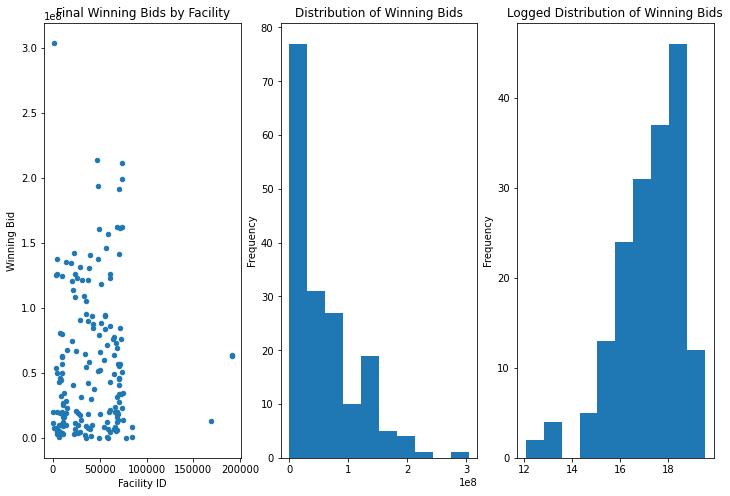

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(12,8))

# Winning Bids by Facility
win_bids.plot(ax = axes[0], x = 'facility_id', y='compensation', kind='scatter', 
            title = "Final Winning Bids by Facility", xlabel='Facility ID', ylabel= 'Winning Bid')


# Histogram of Winning Bids
win_bids['compensation'].plot(ax = axes[1], kind='hist', title = 'Distribution of Winning Bids', ylabel= 'Winning Bid')


# Histogram of logged Winning Bids
np.log(win_bids.query('compensation > 0')['compensation']).plot(ax = axes[2], kind='hist', title = 'Logged Distribution of Winning Bids', ylabel= 'Winning Bid')

#### `win_bids` condensed & sorted into `win_bids_small`

In [63]:
win_bids_small = (win_bids[['facility_id', 'dma', 'winning_bid_option', 'compensation']]
        .sort_values('compensation', ascending=False))

win_bids_small.head()

,facility_id,dma,winning_bid_option,compensation
154,35630,"Springfield, MO",Go off-air,0
153,58616,"Santa Barbara-Santa Maria-San Luis Obispo, CA",Go off-air,173076
159,77678,"Tri-Cities, TN-VA",Go off-air,217449
23,49240,"Chattanooga, TN",Move to Low-VHF,370099
82,84214,"Memphis, TN",Go off-air,485661


#### Outliers by winning bid (DMA - Facility_ID - Bid)
 - **Chicago, IL - 998 - $304,250,040**

---
#### Combining `area_facility` & `win_bids` + Exploratory

In [55]:
area_facility.head()

,facility_id,FileNumber,Call,Ch,City,St,Type,Area,Population
0,21488,BLCDT20110307ACV,KYES-TV,5,ANCHORAGE,AK,DT,30393.4,391590
1,804,BMLEDT20080325ADD,KAKM,8,ANCHORAGE,AK,DT,26625.7,379105
2,10173,BLCDT20090619ABI,KTUU-TV,10,ANCHORAGE,AK,DT,26489.7,379047
3,13815,BLCDT20090928AKO,KYUR,12,ANCHORAGE,AK,DT,25473.6,379027
4,35655,BLCDT20090608ABN,KTBY,20,ANCHORAGE,AK,DT,9261.0,346562


In [56]:
win_bids_small.head()

,facility_id,dma,winning_bid_option,compensation
27,998,"Chicago, IL",Go off-air,304250040
96,47535,"New York, NY",Go off-air,214023017
99,74156,"New York, NY",Go off-air,211680472
101,74215,"New York, NY",Go off-air,198965211
97,48477,"New York, NY",Go off-air,193892273


In [61]:
win_bids_area = area_facility.merge(win_bids_small, on='facility_id', how="right")

win_bids_area.head()

,facility_id,FileNumber,Call,Ch,City,St,Type,Area,Population,dma,winning_bid_option,compensation
0,998,BLCDT20140709ACQ,WWTO-TV,10,LA SALLE,IL,DT,34703.5,6246736,"Chicago, IL",Go off-air,304250040
1,47535,BPCDT20080620ADL,WNBC,28,NEW YORK,NY,DT,29112.7,20338490,"New York, NY",Go off-air,214023017
2,74156,BLCDT20140925AFG,WRNN-TV,48,KINGSTON,NY,DT,29044.9,16748933,"New York, NY",Go off-air,211680472
3,74215,BLCDT20050214AGS,WXTV-DT,40,PATERSON,NJ,DT,22907.3,19476238,"New York, NY",Go off-air,198965211
4,48477,BLEDT20061121ADG,WNJN,51,MONTCLAIR,NJ,DT,16437.6,17655414,"New York, NY",Go off-air,193892273


In [62]:
win_bids_area.to_csv("data/merged_bid_area.csv")